<a href="https://colab.research.google.com/github/vlvt/Bitcoin-Forecasting-Volatility/blob/main/bitcoin_volatility_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step o. Project Description.

In this project, I analyze historical Bitcoin price data over the past three years using Python in Google Colab. My primary goal is to understand how Bitcoin's price behaves over time, calculate key financial metrics (such as returns and volatility), and interpret the results from both mathematical and financial perspectives.

##Objectives
Load real-world Bitcoin data using the yfinance library.

Clean and preprocess the data for analysis.

Calculate daily returns, log returns, volatility, autocorrelation, and covariance.

Visualize price behavior and statistical patterns through plots and summary statistics.

Interpret the findings in the context of long-term investment strategies (e.g., HODL).

Reflect on the limitations of the dataset, especially its unsuitability for high-frequency or grid trading strategies due to daily granularity.

##Note
This project focuses on long-term behavior. Since the dataset contains only daily price data, it is not suitable for algorithmic strategies like grid bots that rely on high-frequency (minute-level) data. The insights here are aimed at investors evaluating Bitcoin’s historical behavior for long-term decision-making.




# Step 1.  Data Preparation

In [55]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf

In [56]:
# Download Bitcoin price data using yfinance
btc = yf.download('BTC-USD', start='2020-06-09', end='2025-06-09', interval='1d')

# Display the first 5 rows
btc.head()

/tmp/ipython-input-56-581416043.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc = yf.download('BTC-USD', start='2020-06-09', end='2025-06-09', interval='1d')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2020-06-09,9795.700195,9836.369141,9664.719727,9774.360352,23717842783
2020-06-10,9870.094727,9908.896484,9728.291016,9794.119141,25706567601
2020-06-11,9321.781250,9938.297852,9263.069336,9870.078125,30247143440
2020-06-12,9480.843750,9540.465820,9285.851562,9320.690430,22610564515
2020-06-13,9475.277344,9493.211914,9396.009766,9480.735352,17564322315


In [57]:
print("Shape of dataset:", btc.shape)
print("\nData types:", btc.dtypes)
print("\nMissing values:", btc.isnull().sum())

Shape of dataset: (1826, 5)

Data types: Price   Ticker 
Close   BTC-USD    float64
High    BTC-USD    float64
Low     BTC-USD    float64
Open    BTC-USD    float64
Volume  BTC-USD      int64
dtype: object

Missing values: Price   Ticker 
Close   BTC-USD    0
High    BTC-USD    0
Low     BTC-USD    0
Open    BTC-USD    0
Volume  BTC-USD    0
dtype: int64


##Data Preparation Results
After importing and checking the dataset:

**Shape:** (1826, 5) — I have 1826 daily records and 5 columns.

**Data Types:**
All price columns (Close, High, Low, Open) are of type float64.
Volume is of type int64.

**Missing Values:**
There are no missing values in any of the columns.

**Interpretation:**
The dataset is clean and ready for further analysis. Since all price columns are floats and there are no missing values, I can compute daily returns, volatility, and other financial metrics without additional data cleaning.

**Note:**
Because I am using daily-level data, this analysis is suitable for studying long-term market trends and holding strategies (HODL). For high-frequency trading strategies like GRID bots, minute-level data would be required, which is not available through Yahoo Finance's historical daily data.


In [58]:
print(type(btc.index))
#**Note on Date Index:**
#In our dataset, the date is set as the index (DatetimeIndex). This is ideal for time series analysis and plotting. We do not need to convert the date column or change its data type. If it had been an object type, we could have used `pd.to_datetime()`, but in this case, yfinance already parses the date properly.


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


# Step 2. Financial Metrics

1. Daily Returns  
2. Log Returns  
3. Rolling Volatility  
4. Cumulative Returns  
5. Sharpe Ratio  
6. Max Drawdown  

**Metrics I will calculate:**
- **Daily Returns**: Measures the daily percentage change in price.
- **Log Returns**: A more statistically sound way to calculate returns, accounting for compounding effects.
- **Rolling Volatility**: Measures the risk or uncertainty in returns over time.
- **Cumulative Returns**: Shows the total return of holding Bitcoin over the entire period.
- **Sharpe Ratio**: Evaluates risk-adjusted performance.
- **Max Drawdown**: Measures the worst historical drop from a peak to a trough.

Each metric is important for financial analysis and is widely used by analysts and traders to understand risk and return dynamics.

I use a `try-except` block to handle cases where the DataFrame has a MultiIndex. This ensures that the analysis runs smoothly regardless of the data format.

In [59]:
print(btc.columns)

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])


In [60]:
try:
  btc.columns = btc.columns.droplevel(1)
  print("MultiIndex detected and dropped.")
except Exception as e:
  print("No MultiIndex to drop or error occured:", e)


print("Columns after flattering:", btc.columns)

MultiIndex detected and dropped.
Columns after flattering: Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')


In [61]:
btc['Daily Return'] = btc['Close'].pct_change() * 100
display(btc[['Close', 'Daily Return']].head(10))

Price,Close,Daily Return
Date,,
2020-06-09,9795.700195,NaN
2020-06-10,9870.094727,0.759461
2020-06-11,9321.781250,-5.555301
2020-06-12,9480.843750,1.706353
2020-06-13,9475.277344,-0.058712
2020-06-14,9386.788086,-0.933896
2020-06-15,9450.702148,0.680894
2020-06-16,9538.024414,0.923976
2020-06-17,9480.254883,-0.605676


In [62]:
btc['Log Return'] = np.log(btc['Close'] / btc['Close'].shift(1)) * 100
display(btc[['Close', 'Log Return']].head(10))

Price,Close,Log Return
Date,,
2020-06-09,9795.700195,NaN
2020-06-10,9870.094727,0.756592
2020-06-11,9321.781250,-5.715572
2020-06-12,9480.843750,1.691958
2020-06-13,9475.277344,-0.058729
2020-06-14,9386.788086,-0.938284
2020-06-15,9450.702148,0.678586
2020-06-16,9538.024414,0.919734
2020-06-17,9480.254883,-0.607518


**Rolling Volatility:**
- The first 29 rows of Rolling Volatility are NaN because I need at least 30 log return values to compute the standard deviation.
- This is expected behavior when working with rolling window calculations.
- Starting from day 30, Rolling Volatility reflects the 30-day standard deviation of the log returns, allowing me to analyze the risk and variability of Bitcoin's returns over time.

In [63]:
btc['Rolling Volatility'] = btc['Log Return'].rolling(window=30).std()
display(btc[['Log Return', 'Rolling Volatility']].head(35))
#i need to use more than 30 rows

Price,Log Return,Rolling Volatility
Date,,
2020-06-09,NaN,NaN
2020-06-10,0.756592,NaN
2020-06-11,-5.715572,NaN
2020-06-12,1.691958,NaN
2020-06-13,-0.058729,NaN
2020-06-14,-0.938284,NaN
2020-06-15,0.678586,NaN
2020-06-16,0.919734,NaN
2020-06-17,-0.607518,NaN


In [64]:
btc['Cumulative Return'] = (1 + btc['Daily Return'] / 100).cumprod()
display(btc[['Close', 'Cumulative Return']].head(10))

Price,Close,Cumulative Return
Date,,
2020-06-09,9795.700195,NaN
2020-06-10,9870.094727,1.007595
2020-06-11,9321.781250,0.951620
2020-06-12,9480.843750,0.967858
2020-06-13,9475.277344,0.967289
2020-06-14,9386.788086,0.958256
2020-06-15,9450.702148,0.964781
2020-06-16,9538.024414,0.973695
2020-06-17,9480.254883,0.967798


In [65]:
avg_daily_return = btc['Daily Return'].mean()
std_daily_return = btc['Daily Return'].std()
sharpe_ratio = (avg_daily_return / std_daily_return) * np.sqrt(252)
print("Annualized Sharpe Ratio:", round(sharpe_ratio, 2))

Annualized Sharpe Ratio: 0.91


In [66]:
cumulative_max = btc['Cumulative Return'].cummax()
drawdown = btc['Cumulative Return'] / cumulative_max - 1
max_drawdown = drawdown.min()
print("Maximum Drawdown:", round(max_drawdown * 100, 2), "%")

Maximum Drawdown: -76.63 %


# Step 3. Visualize Metrics

In this step, I will create visualizations to better understand the financial metrics I have calculated. Visualizing the data helps me identify trends, volatility patterns, and potential risks associated with Bitcoin.

**Visualizations:**
- Price Chart  
- Daily Returns Plot  
- Rolling Volatility Plot  
- Cumulative Return Plot  
- Histogram of Daily Returns  

These visualizations are essential for understanding market behavior and communicating insights effectively.

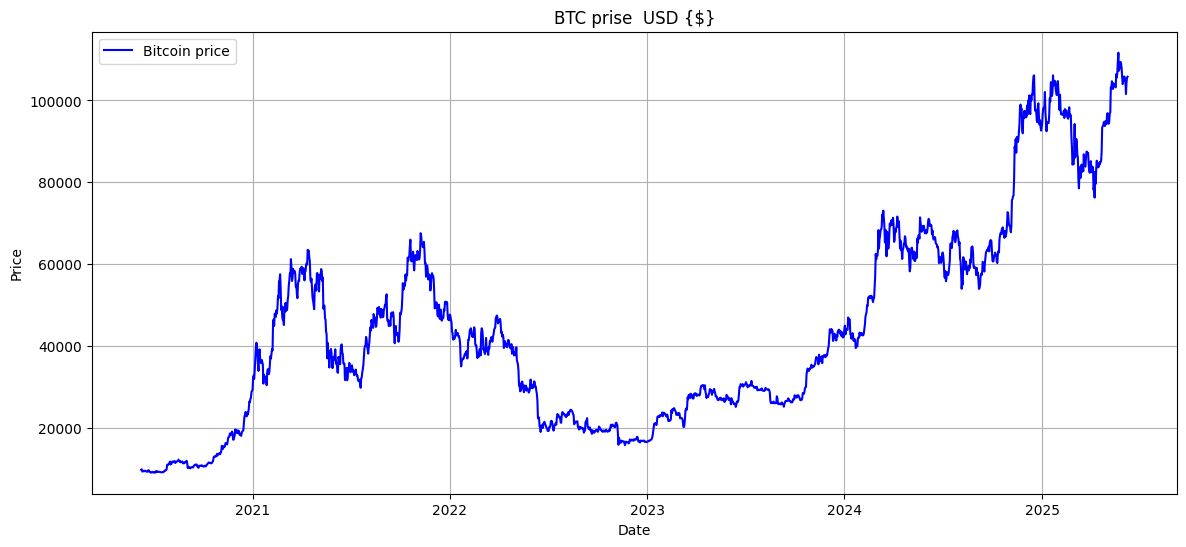

In [67]:
plt.figure(figsize = (14,6))
plt.plot(btc.index, btc['Close'], label = 'Bitcoin price', color = 'Blue')
plt.title('BTC prise  USD {$}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

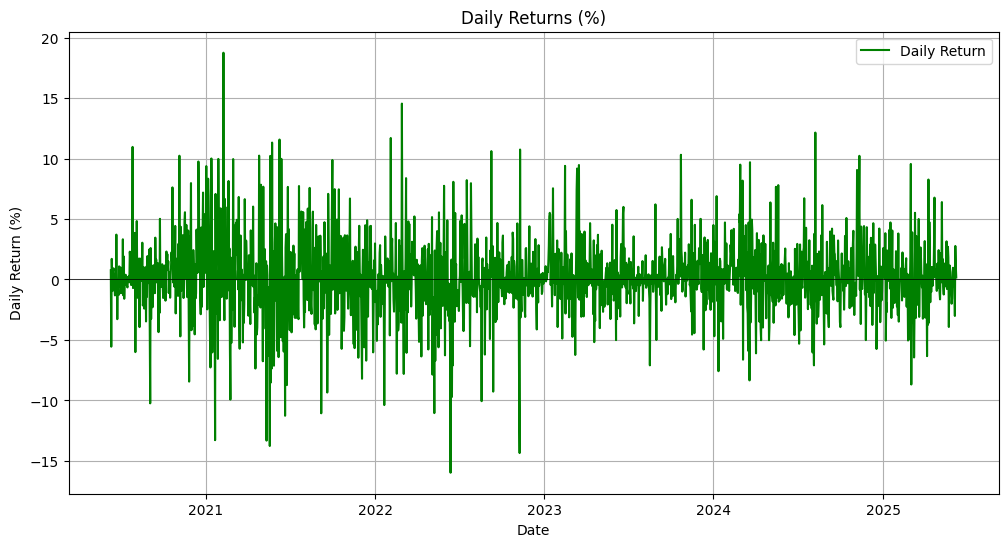

In [68]:
plt.figure(figsize=(12, 6))
plt.plot(btc.index, btc['Daily Return'], label='Daily Return', color='green')
plt.axhline(0, color='black', linewidth=0.5)
plt.title('Daily Returns (%)')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.legend()
plt.grid(True)
plt.show()

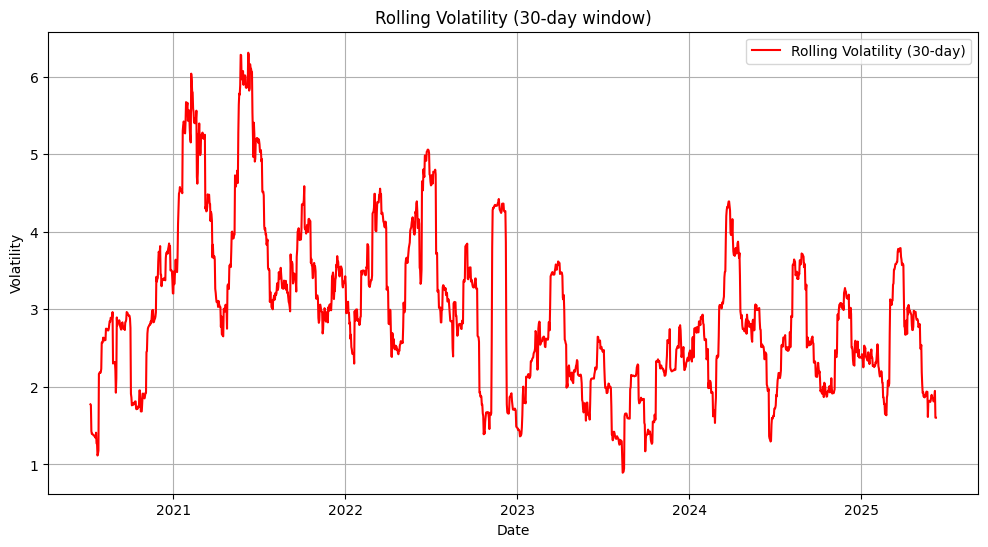

In [69]:
plt.figure(figsize=(12, 6))
plt.plot(btc.index, btc['Rolling Volatility'], label='Rolling Volatility (30-day)', color='red')
plt.title('Rolling Volatility (30-day window)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

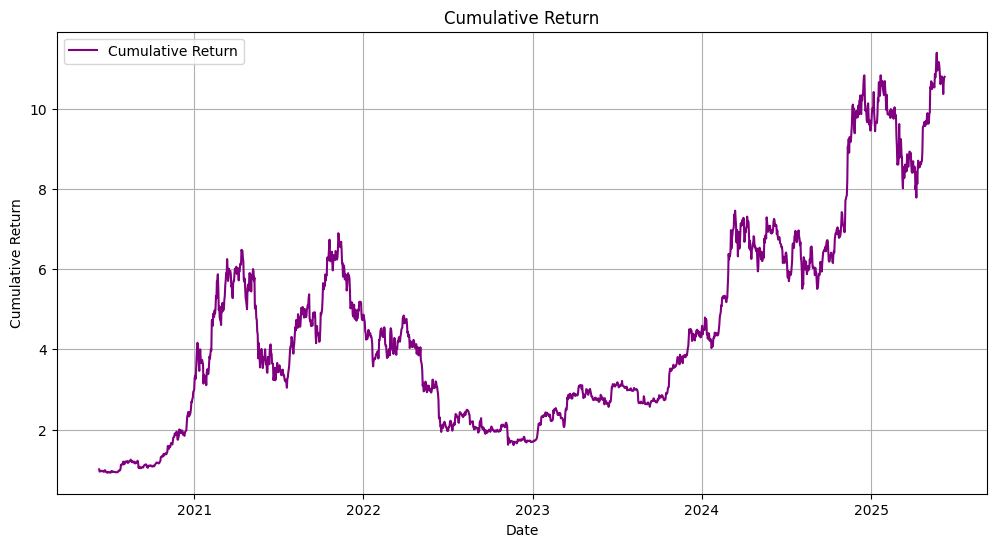

In [70]:
plt.figure(figsize=(12, 6))
plt.plot(btc.index, btc['Cumulative Return'], label='Cumulative Return', color='purple')
plt.title('Cumulative Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

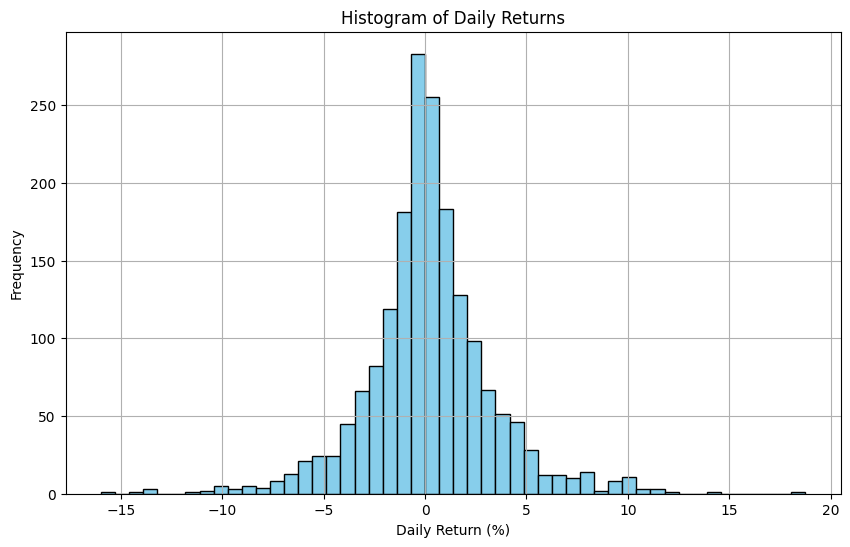

In [71]:
plt.figure(figsize=(10, 6))
plt.hist(btc['Daily Return'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#  Step 4. Correlation and Covariance Analysis

In this step, I will analyze the relationships between the key financial metrics I have calculated. Understanding correlations and covariances helps us identify how different variables move together, which is crucial for risk management and portfolio construction.

**Analysis Objectives:**
- Calculate pairwise correlation between:
  - Daily Return and Rolling Volatility
  - Daily Return and Price
  - Rolling Volatility and Price
- Calculate covariance between selected pairs.
- Visualize the correlations using a heatmap and scatter plots.

These analyses help us understand if higher volatility is associated with higher or lower returns, and whether Bitcoin price and volatility tend to move together or separately.


In [72]:
#before visualizing correlation matrix I 'll drop all NaN cells

In [73]:
print(btc.columns)
print(btc.isnull().sum())

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'Daily Return', 'Log Return',
       'Rolling Volatility', 'Cumulative Return'],
      dtype='object', name='Price')
Price
Close                  0
High                   0
Low                    0
Open                   0
Volume                 0
Daily Return           1
Log Return             1
Rolling Volatility    30
Cumulative Return      1
dtype: int64


In [74]:
btc_cleaned = btc.dropna()
print("Cleaned shape:", btc_cleaned.shape)

Cleaned shape: (1796, 9)


In [75]:
corr_matrix_all = btc_cleaned.corr()
print(corr_matrix_all)

Price                  Close      High       Low      Open    Volume  \
Price                                                                  
Close               1.000000  0.999220  0.999020  0.998173  0.351514   
High                0.999220  1.000000  0.998472  0.999132  0.365698   
Low                 0.999020  0.998472  1.000000  0.998785  0.331768   
Open                0.998173  0.999132  0.998785  1.000000  0.352016   
Volume              0.351514  0.365698  0.331768  0.352016  1.000000   
Daily Return        0.018271 -0.007129 -0.005708 -0.036005 -0.005280   
Log Return          0.019288 -0.006669 -0.003949 -0.034957 -0.018101   
Rolling Volatility -0.021289 -0.012104 -0.033379 -0.021288  0.346897   
Cumulative Return   1.000000  0.999220  0.999020  0.998173  0.351514   

Price               Daily Return  Log Return  Rolling Volatility  \
Price                                                              
Close                   0.018271    0.019288           -0.021289   
Hig

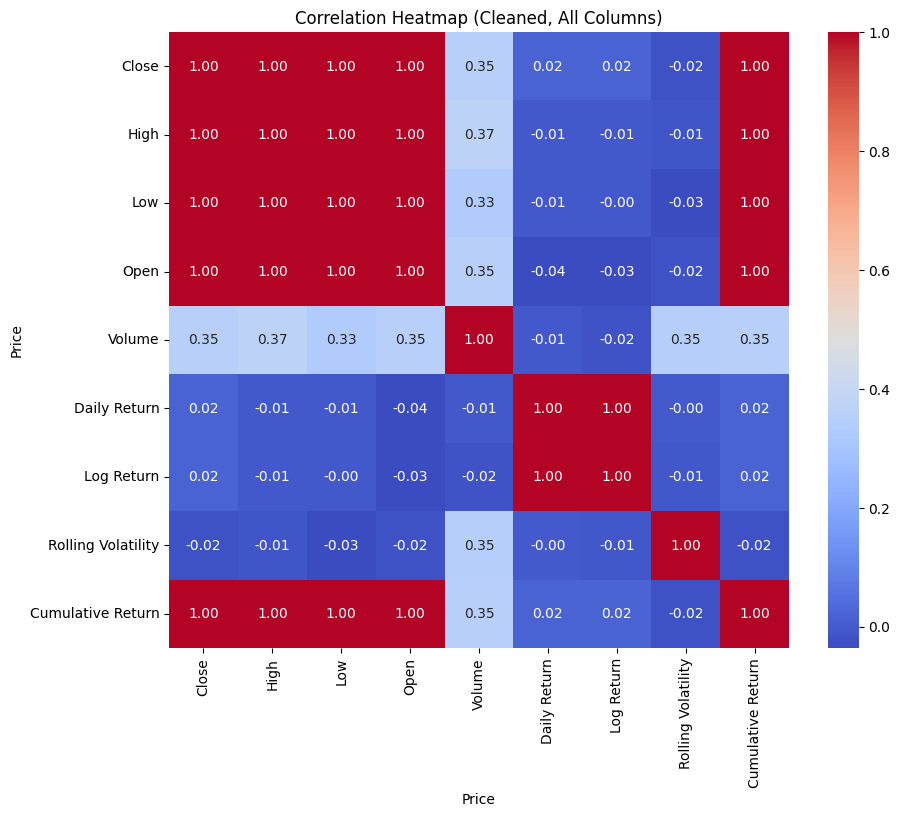

In [76]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix_all, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Cleaned, All Columns)')
plt.show()

 Interpretation of Correlation Matrix

- **Close, High, Low, Open:** These variables show extremely high positive correlation (near 1.00). This is expected since they all reflect Bitcoin's daily price movements.
- **Volume:** Shows a moderate correlation (~0.35) with prices. This indicates that higher prices often coincide with higher trading activity, but the relationship is not extremely strong.
- **Daily Return & Log Return:** Very low correlation with price (~0.01–0.02). This makes sense, as returns measure relative changes rather than absolute levels.
- **Rolling Volatility:** Very weak correlation with price (0.00), but a moderate positive correlation with volume (0.36). This suggests that volatility increases when trading activity rises.
- **Cumulative Return:** Extremely high correlation with prices (~1.00), which is logical since it accumulates daily returns and therefore closely tracks the price trend.

**Conclusion:**  
The analysis shows that price-based metrics are strongly interconnected, while returns and volatility offer independent insights into Bitcoin's risk and performance characteristics. This highlights the importance of analyzing multiple metrics rather than relying solely on price.


**Dynamic Correlation Analysis (Volatility Regimes)**

Since Bitcoin is a highly volatile asset, a single correlation matrix may hide important differences between calm and turbulent market periods. To address this, we split the data into:
- **High Volatility Periods** (Rolling Volatility > median)
- **Low Volatility Periods** (Rolling Volatility <= median)

I then calculate separate correlation matrices for each period to analyze how relationships between key metrics change during different market regimes. This analysis helps us understand the market dynamics and design more adaptive investment strategies.



In [77]:
median_vol = btc_cleaned['Rolling Volatility'].median()
print(median_vol)

high_vol = btc_cleaned[btc_cleaned['Rolling Volatility'] > median_vol]
low_vol = btc_cleaned[btc_cleaned['Rolling Volatility'] <= median_vol]

corr_high_vol = high_vol.corr()
corr_low_vol = low_vol.corr()

2.833173535368835


In [78]:
print("High Volatility Periods:", high_vol.shape[0])
print("Low Volatility Periods:", low_vol.shape[0])

High Volatility Periods: 898
Low Volatility Periods: 898


Correlation High Volatility: 
 Price                  Close      High       Low      Open    Volume  \
Price                                                                  
Close               1.000000  0.998572  0.998303  0.996513  0.223179   
High                0.998572  1.000000  0.997376  0.998543  0.241297   
Low                 0.998303  0.997376  1.000000  0.997613  0.198795   
Open                0.996513  0.998543  0.997613  1.000000  0.226696   
Volume              0.223179  0.241297  0.198795  0.226696  1.000000   
Daily Return        0.046098  0.008633  0.014174 -0.030651 -0.029488   
Log Return          0.048315  0.010102  0.017463 -0.028362 -0.041747   
Rolling Volatility -0.204648 -0.197323 -0.215938 -0.205530  0.178253   
Cumulative Return   1.000000  0.998572  0.998303  0.996513  0.223179   

Price               Daily Return  Log Return  Rolling Volatility  \
Price                                                              
Close                   0.046098    0.04

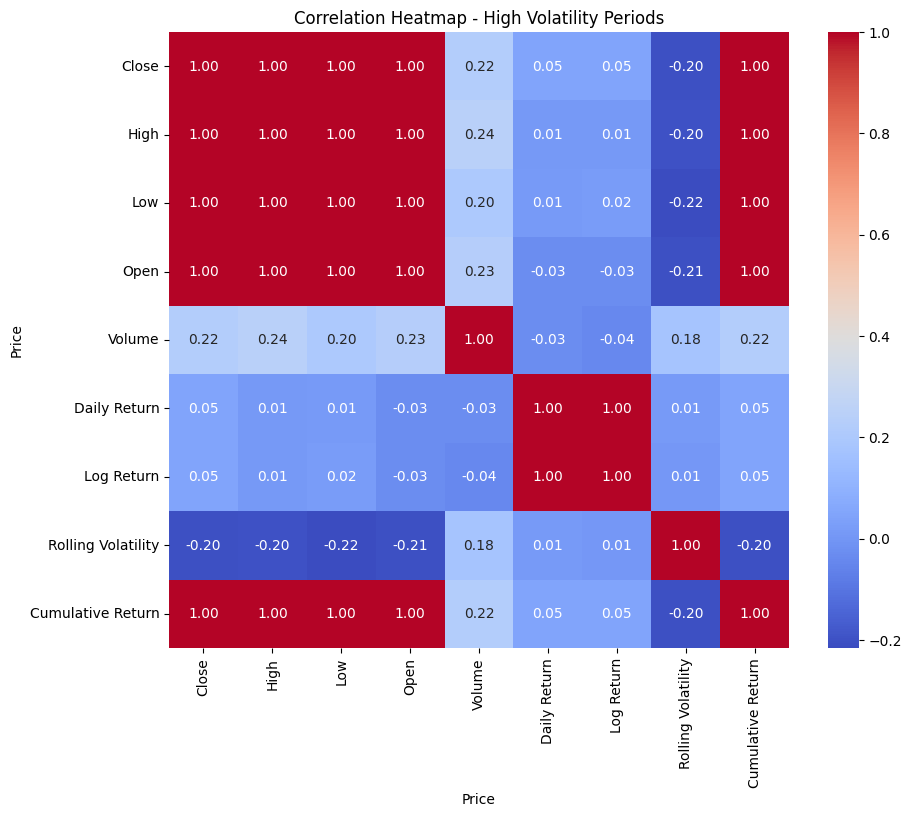

In [79]:
print("Correlation High Volatility: \n", corr_high_vol)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_high_vol, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap - High Volatility Periods')
plt.show()

Correlation Low Volatility: 
 Price                  Close      High       Low      Open    Volume  \
Price                                                                  
Close               1.000000  0.999635  0.999500  0.999107  0.530354   
High                0.999635  1.000000  0.999338  0.999508  0.538312   
Low                 0.999500  0.999338  1.000000  0.999526  0.517804   
Open                0.999107  0.999508  0.999526  1.000000  0.527719   
Volume              0.530354  0.538312  0.517804  0.527719  1.000000   
Daily Return       -0.013454 -0.028183 -0.031952 -0.049377  0.054300   
Log Return         -0.013824 -0.028822 -0.032062 -0.049772  0.045966   
Rolling Volatility  0.172445  0.175663  0.168861  0.172111  0.241179   
Cumulative Return   1.000000  0.999635  0.999500  0.999107  0.530354   

Price               Daily Return  Log Return  Rolling Volatility  \
Price                                                              
Close                  -0.013454   -0.013

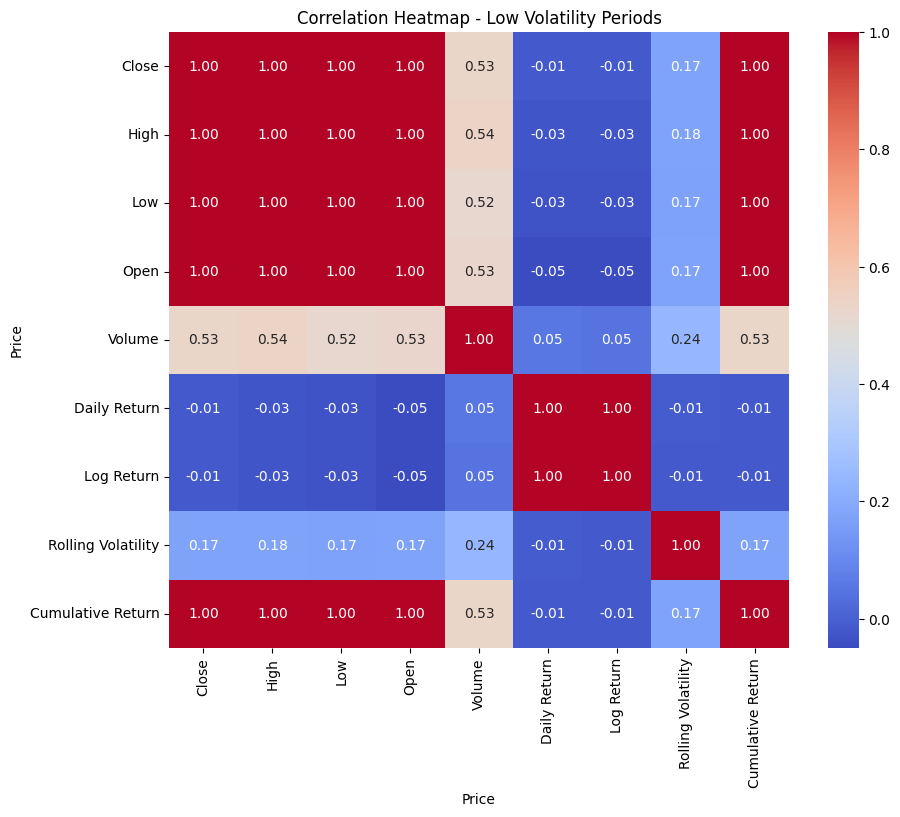

In [80]:
print("Correlation Low Volatility: \n",corr_low_vol)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_low_vol, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap - Low Volatility Periods')
plt.show()

Interpretation of Dynamic Correlation Analysis

**High Volatility Periods:**  
- Prices (Close, High, Low, Open) are still highly correlated (~1.00).
- Volume shows a weak positive correlation. This suggests that during volatile periods, increased trading volume might coincide with declining prices and higher risk.

- Daily Return and Log Return exhibit almost no correlation with price and a slight negative correlation with Rolling Volatility, indicating that daily fluctuations do not consistently align with volatility spikes.

**Low Volatility Periods:**  
- Prices remain highly correlated (~1.00).
- Volume shows a stronger positive correlation with price (~0.53), reflecting that in stable periods, rising prices often coincide with increased trading activity.
- Rolling Volatility demonstrates a slight positive correlation (~0.16) with price, indicating that small price changes can still generate noticeable volatility even in calm markets.
- Daily Return and Log Return continue to show near-zero correlation with price, consistent with the stable market environment.

**Conclusion:**  
This dynamic analysis shows that Bitcoin's market structure changes significantly between high and low volatility periods. Understanding these differences helps investors and traders design more adaptive strategies, adjust risk management approaches, and better anticipate market behavior during different regimes.


#Step 5: Advanced Financial Analysis



>

In this step, I explore advanced analytical methods to deepen our understanding of Bitcoin's market behavior. I apply risk management models, volatility modeling, time series analysis, and other advanced techniques to provide insights that go beyond basic descriptive statistics.

**Potential Analyses:**
- Value at Risk (VaR) and Conditional VaR (CVaR)
- GARCH Modeling for volatility forecasting
- Autocorrelation analysis (ACF/PACF)
- ARIMA/Prophet forecasting
- Monte Carlo simulation
- Clustering market regimes based on volatility
- Cross-asset correlation analysis
- Drawdown analysis and risk metrics
- Sharpe Ratio dynamics over time

Each of these analyses enhances our ability to understand, predict, and manage Bitcoin's market risk, making this project a comprehensive case study in financial data analysis.




##Value at Risk (VaR),  Conditional VaR (CVaR)


**Value at Risk (VaR)** is a risk measure that estimates the maximum potential loss of an investment over a specified time period, given a certain confidence level. For example, a 95% one-day VaR of 5% means there is a 95% chance that the investment will not lose more than 5% of its value in a single day.

**Conditional Value at Risk (CVaR)**, also known as Expected Shortfall, represents the **average loss** that exceeds the VaR threshold. It answers the question: "If the loss exceeds the VaR level, how bad could it get on average?"



In [81]:
confidence_level = 0.95
daily_returns = btc_cleaned['Daily Return'].dropna()

#Historical VaR
VaR = np.percentile(daily_returns, (1-confidence_level) * 100)

#Conditional VaR - CVaR. - we use it becouse daily return chart looks like normal destribution - bell-shaped - it was visualized previously
CVaR = daily_returns[daily_returns <= VaR].mean()


print(f"Value at Risk (VaR) at {int(confidence_level*100)}% confidence: {VaR:.2f}%")
print(f"Conditional Value at Risk (CVaR) at {int(confidence_level*100)}% confidence: {CVaR:.2f}%")

Value at Risk (VaR) at 95% confidence: -4.80%
Conditional Value at Risk (CVaR) at 95% confidence: -7.12%


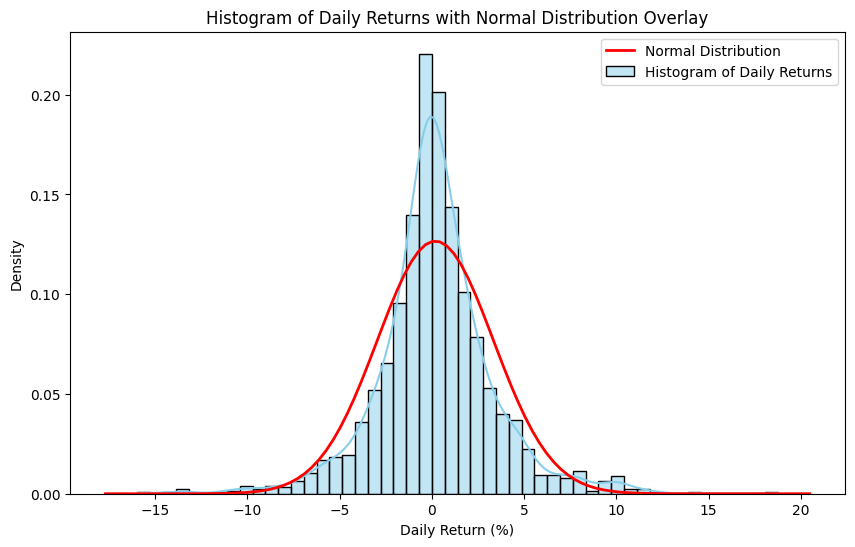

In [82]:
from scipy.stats import norm

plt.figure(figsize=(10,6))
sns.histplot(daily_returns, bins=50, kde=True, color='skyblue', stat='density', label='Histogram of Daily Returns')
mean = daily_returns.mean()
std = daily_returns.std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'r', linewidth=2, label='Normal Distribution')
plt.xlabel('Daily Return (%)')
plt.ylabel('Density')
plt.legend()
plt.title('Histogram of Daily Returns with Normal Distribution Overlay')
plt.show()


## Volatility Modeling (GARCH)

In [83]:
!pip install arch
from arch import arch_model
print(arch_model)

<function arch_model at 0x7b2471563920>


Volatility Modeling using GARCH

Financial time series often exhibit volatility clustering — periods of high volatility tend to cluster together. The GARCH (Generalized Autoregressive Conditional Heteroskedasticity) model captures this feature by modeling the current volatility as a function of both past squared returns (shocks) and past volatility.

**Why GARCH?**
- Financial assets, especially cryptocurrencies, are known for periods of market turbulence.
- GARCH models help estimate and forecast volatility, which is crucial for risk management and strategy development.

In this section, I apply a GARCH(1,1) model to Bitcoin's daily returns to understand its volatility dynamics.


In [84]:
returns = btc_cleaned['Daily Return'].dropna()

In [85]:
model = arch_model(returns, vol = 'Garch', p=1, q=1, dist='normal')
garch_fit = model.fit(disp='off')

print(garch_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:           Daily Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4529.01
Distribution:                  Normal   AIC:                           9066.01
Method:            Maximum Likelihood   BIC:                           9087.99
                                        No. Observations:                 1796
Date:                Fri, Jun 27 2025   Df Residuals:                     1795
Time:                        13:09:15   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1989  6.599e-02      3.013  2.583e-03 [6.953e-0

In [86]:
forecast = garch_fit.forecast(horizon =5)
print(forecast.variance[-1:])

                 h.1       h.2       h.3       h.4       h.5
Date                                                        
2025-06-08  5.375257  5.542881  5.704669  5.860825  6.011544


Interpretation of GARCH(1,1) Results

The GARCH(1,1) model provides valuable insights into Bitcoin's volatility dynamics:

- **omega (0.3548):** This is the long-term volatility level. A higher value indicates a relatively unstable market environment.
- **alpha (0.0635):** This parameter measures the impact of recent shocks on volatility. A moderate value suggests that sudden events moderately influence daily volatility.
- **beta (0.9017):** This parameter reflects volatility persistence. A high value close to 1 means that shocks to volatility are long-lasting, and the market takes time to return to normal levels.

Since (alpha + beta) ≈ 0.965, we conclude that Bitcoin's volatility is highly persistent. This is typical for financial time series, especially for cryptocurrencies.

**Volatility Forecast:**
Using the fitted model, we forecasted volatility for the next 5 days. The forecast shows a slight upward trend, indicating a possible increase in risk in the near term. This information is valuable for risk management and portfolio allocation.




>i will split the data into train and test to analyze efficiency of the forecasting



In [87]:
split = int(len(returns) * 0.8)
train = returns[:split]
test = returns[split:]

In [88]:
model = arch_model(train, vol='Garch', p=1, q=1, dist='normal')
garch_fit = model.fit(disp='off')

In [89]:
test_forecasts = []
for i in range(len(test)):
    data_until_now = returns[:split + i]
    model = arch_model(data_until_now, vol='Garch', p=1, q=1, dist='normal')
    garch_fit = model.fit(disp='off')
    forecast = garch_fit.forecast(horizon=1)
    pred_vol = np.sqrt(forecast.variance.values[-1, :][0])
    test_forecasts.append(pred_vol)


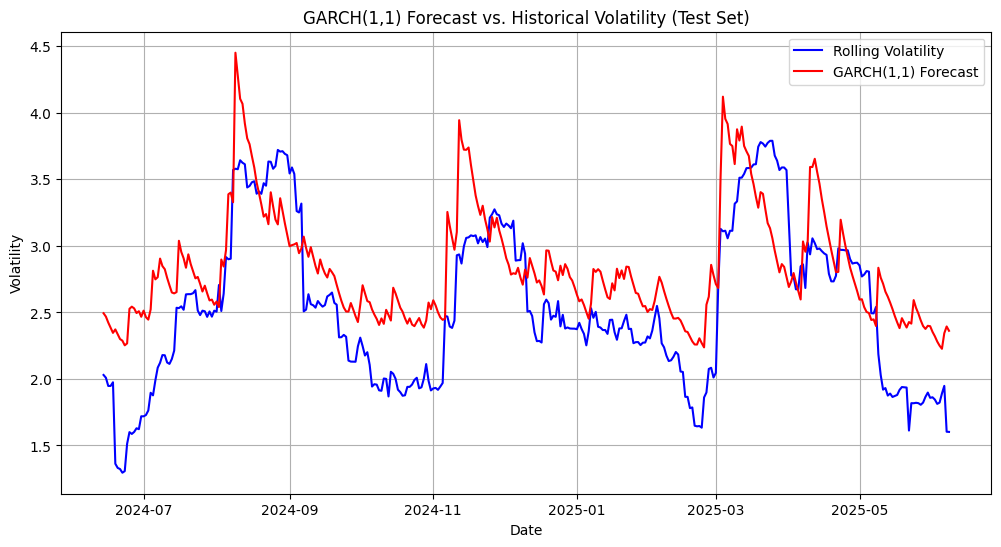

In [90]:
plt.figure(figsize=(12,6))
plt.plot(test.index, btc_cleaned.loc[test.index, 'Rolling Volatility'], label='Rolling Volatility', color='blue')
plt.plot(test.index, test_forecasts, label='GARCH(1,1) Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.title('GARCH(1,1) Forecast vs. Historical Volatility (Test Set)')
plt.grid(True)
plt.show()


In [91]:
from sklearn.metrics import mean_squared_error

actual_vol = btc_cleaned.loc[test.index, 'Rolling Volatility']
mse = mean_squared_error(actual_vol, test_forecasts)
print(f"Mean Squared Error of GARCH Forecast: {mse:.4f}")


Mean Squared Error of GARCH Forecast: 0.2249


i will try use t-distribution to make MSE smaller

In [92]:
model = arch_model(train, vol='Garch', p=1, q=1, dist='t')

In [93]:
model = arch_model(train, vol='EGarch', p=1, q=1, dist='t')
model = arch_model(train, vol='Garch', p=2, q=1, dist='t')

In [94]:

test_forecasts_t = []
for i in range(len(test)):

    data_until_now = returns[:split + i]

    model_t = arch_model(data_until_now, vol='Garch', p=1, q=1, dist='t')

    garch_fit_t = model_t.fit(disp='off')


    forecast_t = garch_fit_t.forecast(horizon=1)

    pred_vol_t = np.sqrt(forecast_t.variance.values[-1, :][0])


    test_forecasts_t.append(pred_vol_t)


In [95]:
test_forecasts_egarch = []
for i in range(len(test)):
    data_until_now = returns[:split + i]
    model_egarch = arch_model(data_until_now, vol='EGarch', p=1, q=1, dist='t')
    garch_fit_egarch = model_egarch.fit(disp='off')
    forecast_egarch = garch_fit_egarch.forecast(horizon=1)
    pred_vol_egarch = np.sqrt(forecast_egarch.variance.values[-1, :][0])
    test_forecasts_egarch.append(pred_vol_egarch)


In [96]:
test_forecasts_garch21 = []
for i in range(len(test)):
    data_until_now = returns[:split + i]
    model_garch21 = arch_model(data_until_now, vol='Garch', p=2, q=1, dist='t')
    garch_fit_garch21 = model_garch21.fit(disp='off')
    forecast_garch21 = garch_fit_garch21.forecast(horizon=1)
    pred_vol_garch21 = np.sqrt(forecast_garch21.variance.values[-1, :][0])
    test_forecasts_garch21.append(pred_vol_garch21)


In [97]:
actual_vol = btc_cleaned.loc[test.index, 'Rolling Volatility']

mse_t = mean_squared_error(actual_vol, test_forecasts_t)
mse_egarch = mean_squared_error(actual_vol, test_forecasts_egarch)
mse_garch21 = mean_squared_error(actual_vol, test_forecasts_garch21)

print(f"Mean Squared Error of GARCH Forecast (t-distribution): {mse_t:.4f}")
print(f"Mean Squared Error of EGARCH Forecast (t-distribution): {mse_egarch:.4f}")
print(f"Mean Squared Error of GARCH(2,1) Forecast (t-distribution): {mse_garch21:.4f}")


Mean Squared Error of GARCH Forecast (t-distribution): 0.2314
Mean Squared Error of EGARCH Forecast (t-distribution): 0.5996
Mean Squared Error of GARCH(2,1) Forecast (t-distribution): 0.2314


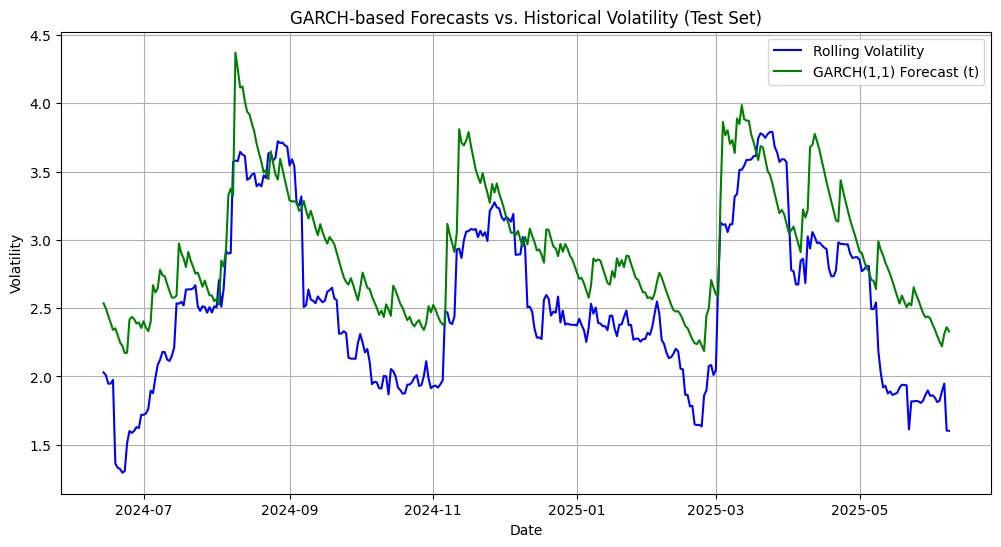

In [98]:
plt.figure(figsize=(12,6))
plt.plot(test.index, actual_vol, label='Rolling Volatility', color='blue')
plt.plot(test.index, test_forecasts_t, label='GARCH(1,1) Forecast (t)', color='green')

plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.title('GARCH-based Forecasts vs. Historical Volatility (Test Set)')
plt.grid(True)
plt.show()


After implementing various volatility models — GARCH(1,1) with normal and t-distribution and GARCH(2,1) — the mean squared errors (MSE) were consistently in the range of 0.22–0.25. EGARCH = 0.58.


## ARIMA / Time Series Forecasting

In [99]:
#checking stationarity
#ADF Test
from statsmodels.tsa.stattools import adfuller

result = adfuller(btc_cleaned['Close'].dropna())
print(f'ADF Statistics: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] <= 0.05:
  print("Series is stationary.")
else:
  print("Series is NOT stationary.")

ADF Statistics: -0.6128390172783932
p-value: 0.8680544641438432
Series is NOT stationary.


In [100]:
btc_diff = btc_cleaned['Close'].diff().dropna()

In [101]:
result_diff = adfuller(btc_diff)
print(f'ADF Statistic (Diff): {result_diff[0]}')
print(f'p-value (Diff): {result_diff[1]}')

ADF Statistic (Diff): -10.623045462459782
p-value (Diff): 5.452922004866757e-19


# Stationarity Testing

Before applying the ARIMA model, I tested the Bitcoin price time series for stationarity using the Augmented Dickey-Fuller (ADF) test.

The results indicate that the BTC price series exhibits a trend and is non-stationary in its raw form. After applying a first-order difference, I achieved stationarity, which is a necessary condition for using ARIMA models effectively.

In [102]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(btc_cleaned['Close'], order=(1,1,1))
arima_fit = model.fit()
print(arima_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1796
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -15667.618
Date:                Fri, 27 Jun 2025   AIC                          31341.236
Time:                        13:11:10   BIC                          31357.714
Sample:                    07-09-2020   HQIC                         31347.319
                         - 06-08-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2590      0.273     -0.948      0.343      -0.795       0.277
ma.L1          0.1987      0.276      0.720      0.472      -0.342       0.740
sigma2      2.238e+06   4.14e+04     54.027      0.0

In [103]:
forecast_steps = 5
forecast = arima_fit.forecast(steps=forecast_steps)
print(forecast)

2025-06-09    105789.457634
2025-06-10    105790.543082
2025-06-11    105790.261943
2025-06-12    105790.334760
2025-06-13    105790.315900
Freq: D, Name: predicted_mean, dtype: float64


ARIMA Forecast Results

The ARIMA(1,1,1) model was applied to forecast Bitcoin prices for the next 5 days.

The ARIMA(1,1,1) model indicates that prices are expected to remain relatively stable over the next few days.

**Important notes:**
- ARIMA captures the trend and autoregressive structure in the series but does not account for volatility clustering or external factors.
- This model is useful for short-term trend forecasting but should be complemented with risk models such as GARCH for a more comprehensive financial analysis.



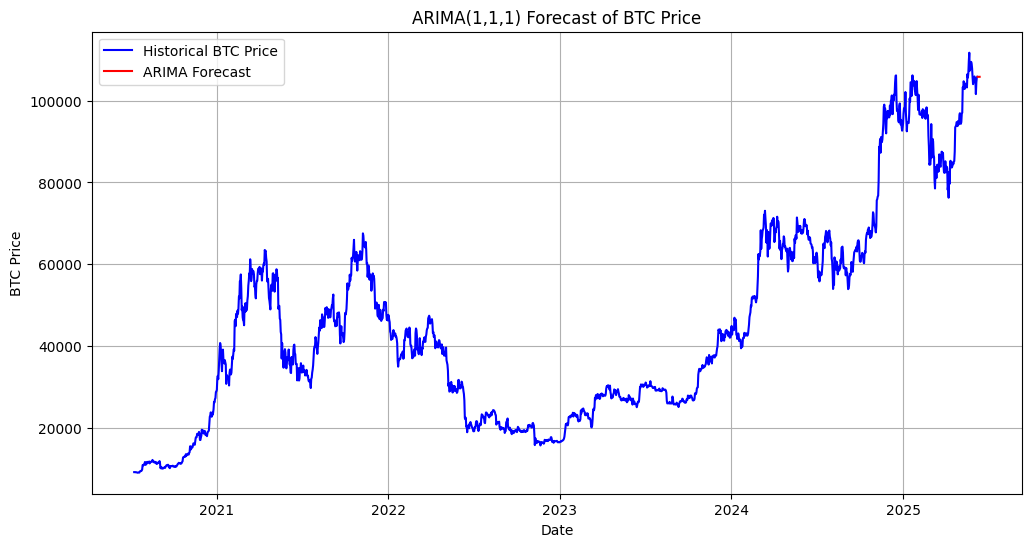

In [104]:
plt.figure(figsize=(12,6))
plt.plot(btc_cleaned['Close'], label='Historical BTC Price', color='blue')
plt.plot(forecast.index, forecast, label='ARIMA Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend()
plt.title('ARIMA(1,1,1) Forecast of BTC Price')
plt.grid(True)
plt.show()

comparing forecasted and historical prices

In [105]:
start_date = '2024-01-01'
end_date = '2025-01-01'
btc_test_period = btc_cleaned.loc[start_date:end_date, 'Close']

In [106]:
btc_returns = btc_test_period.pct_change().dropna() * 100
historical_std = btc_returns.std()
print(f"Historical daily standard deviation: {historical_std:.2f}%")

Historical daily standard deviation: 2.79%


To evaluate the reasonableness of the ARIMA(1,1,1) forecast, we compared the model’s forecasted standard deviation to the actual historical volatility observed in the BTC price from January 2024 to January 2025.

**Interpretation:**  
- At the start of the forecast horizon, the ARIMA model predicts a standard deviation close to historical volatility, indicating reasonable confidence in short-term forecasts.
- As the forecast horizon extends, the standard deviation grows to ~5% of the price, reflecting increasing uncertainty — which is typical for ARIMA models and time series forecasting in general.

This comparison helps validate the ARIMA model’s risk estimates and demonstrates its practical application in financial time series analysis.


##Monte Carlo Simulation

In [110]:
btc_returns = btc_cleaned['Close'].pct_change().dropna()
mu = btc_returns.mean()
sigma = btc_returns.std()

In [111]:
forecast_days = 30
simulations = 1000

In [112]:
np.random.seed(42)
simulated_paths = []

for i in range(simulations):
    random_returns = np.random.normal(mu, sigma, forecast_days)
    path = [btc_cleaned['Close'].iloc[-1]]
    for r in random_returns:
        path.append(path[-1] * (1 + r))
    simulated_paths.append(path)

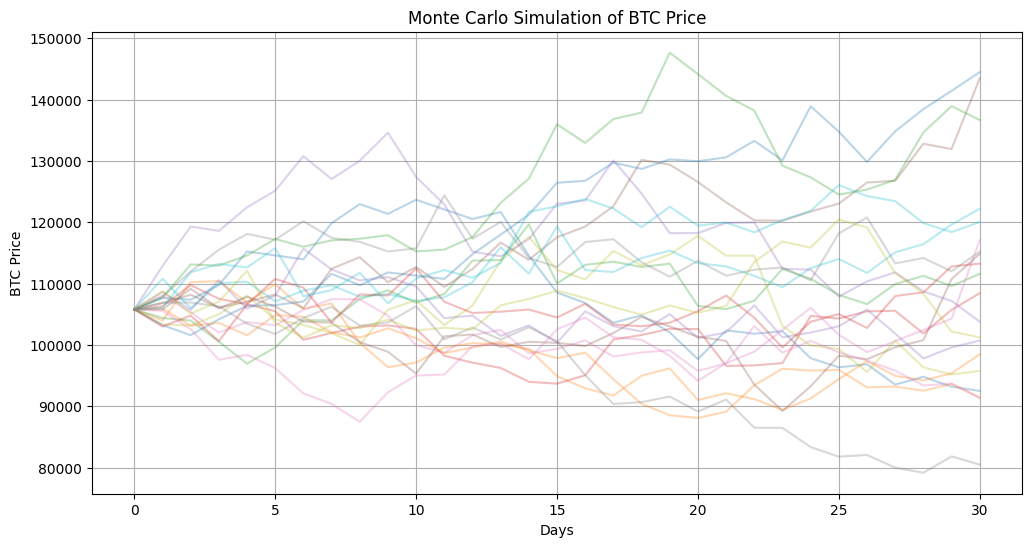

In [113]:
plt.figure(figsize=(12,6))
for path in simulated_paths[:20]:
    plt.plot(path, alpha=0.3)
plt.xlabel('Days')
plt.ylabel('BTC Price')
plt.title('Monte Carlo Simulation of BTC Price')
plt.grid(True)
plt.show()

In [114]:
simulated_paths = np.array(simulated_paths)
median_path = np.median(simulated_paths, axis=0)

In [115]:
lower_bound = np.percentile(simulated_paths, 5, axis=0)
upper_bound = np.percentile(simulated_paths, 95, axis=0)

In [116]:
final_prices = simulated_paths[:, -1]
current_price = btc_cleaned['Close'].iloc[-1]
probability_loss = np.mean(final_prices < current_price) * 100
print(f"Probability of loss: {probability_loss:.2f}%")

Probability of loss: 40.70%


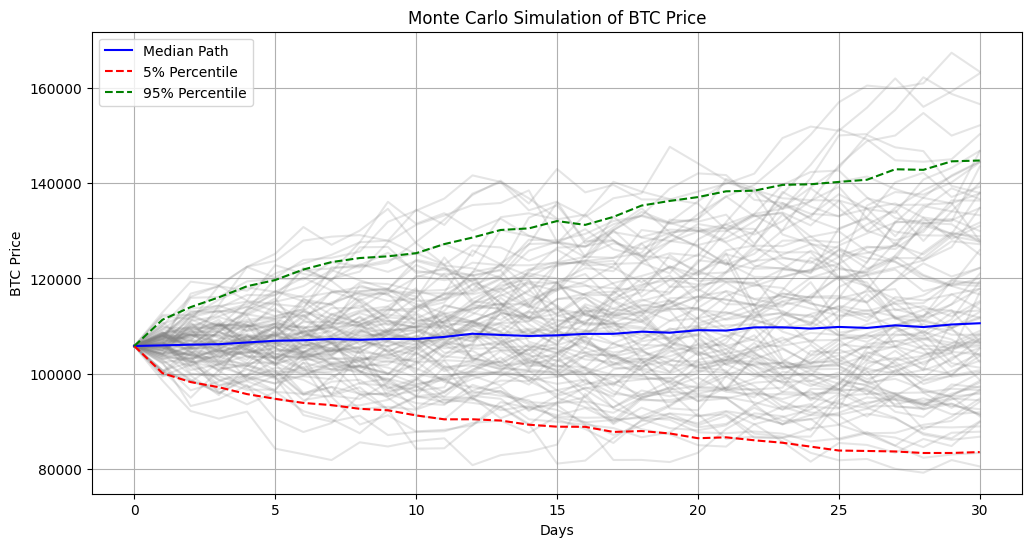

In [117]:
plt.figure(figsize=(12,6))
for i in range(100):
    plt.plot(simulated_paths[i], color='grey', alpha=0.2)
plt.plot(median_path, color='blue', label='Median Path')
plt.plot(lower_bound, color='red', linestyle='--', label='5% Percentile')
plt.plot(upper_bound, color='green', linestyle='--', label='95% Percentile')
plt.xlabel('Days')
plt.ylabel('BTC Price')
plt.title('Monte Carlo Simulation of BTC Price')
plt.legend()
plt.grid(True)
plt.show()

# Monte Carlo Simulation Analysis

After generating 1000 scenarios of BTC price trajectories, I analyzed the results using key statistics:

- **Median Path:** Represents the 50% probability scenario.
- **5%–95% Confidence Interval:** Indicates the range of likely outcomes, providing insight into potential risk.
- **Probability of Loss:** I calculated the probability that BTC price will be below the current price at the end of the forecast horizon.

This analysis helps me understand the uncertainty and risk associated with BTC price forecasts, especially in the context of long-term holding strategies.

## Clustering Volatility Regimes

In [118]:
btc_cleaned.loc[:, 'Rolling Volatility'] = btc_cleaned['Close'].pct_change().rolling(window=30).std() * 100

In [119]:
from sklearn.cluster import KMeans

volatility = btc_cleaned[['Rolling Volatility']].dropna()
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(volatility)

In [120]:
btc_cleaned.loc[volatility.index, 'Volatility Regime'] = clusters

/tmp/ipython-input-120-2359840637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_cleaned.loc[volatility.index, 'Volatility Regime'] = clusters


In [121]:
btc_cleaned = btc_cleaned.copy()
btc_cleaned.loc[volatility.index, 'Volatility Regime'] = clusters

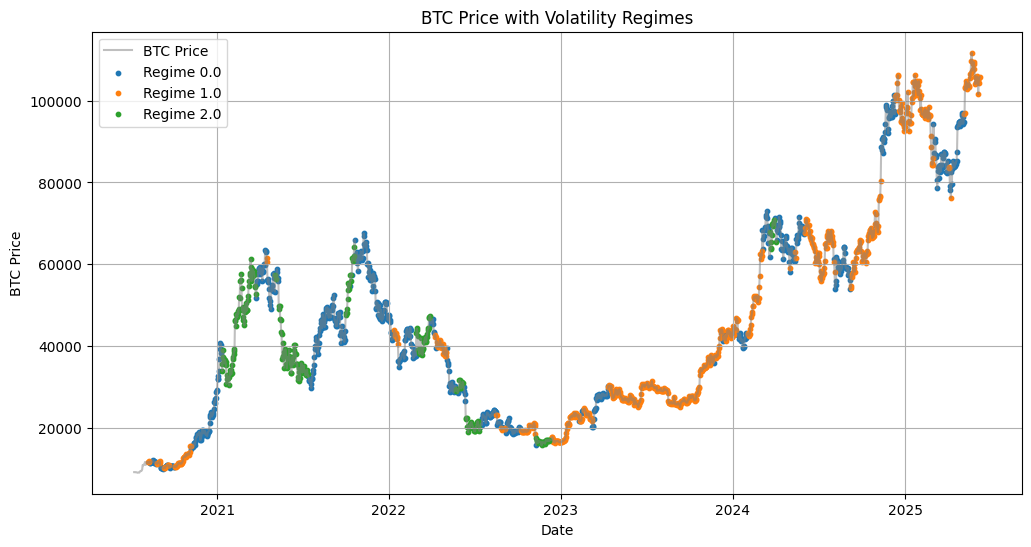

In [122]:
plt.figure(figsize=(12,6))
plt.plot(btc_cleaned['Close'], label='BTC Price', color='grey', alpha=0.5)
for regime in sorted(btc_cleaned['Volatility Regime'].dropna().unique()):
    plt.scatter(btc_cleaned.loc[btc_cleaned['Volatility Regime'] == regime].index,
                btc_cleaned.loc[btc_cleaned['Volatility Regime'] == regime]['Close'],
                label=f'Regime {regime}', s=10)
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.title('BTC Price with Volatility Regimes')
plt.legend()
plt.grid(True)
plt.show()

Visualization of Volatility Regimes

We visualized BTC price colored by volatility regime. This allows us to see which periods were calm (low volatility) and which were turbulent (high volatility).

- **Regime 0:** Stable, low volatility
- **Regime 1:** Moderate volatility
- **Regime 2:** High volatility

This analysis provides insights into how volatility clustering occurs in the crypto market and supports risk management decisions.


In [123]:
volatility_stats = btc_cleaned.groupby('Volatility Regime')['Rolling Volatility'].mean()
print(volatility_stats)

Volatility Regime
0.0    3.250951
1.0    2.107656
2.0    4.802541
Name: Rolling Volatility, dtype: float64


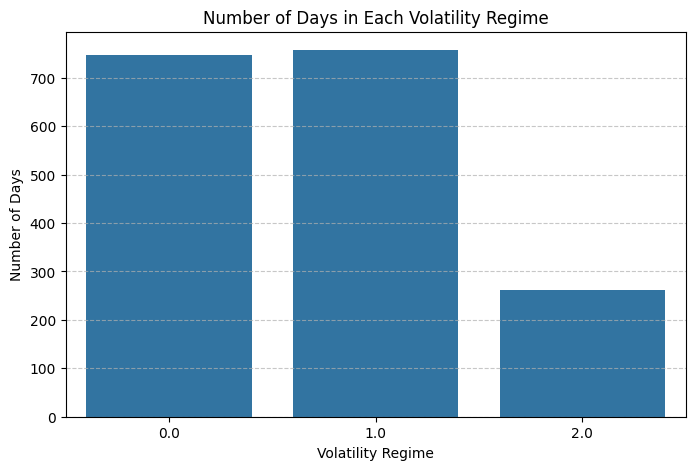

In [124]:
plt.figure(figsize=(8,5))
sns.countplot(x='Volatility Regime', data=btc_cleaned)
plt.title('Number of Days in Each Volatility Regime')
plt.xlabel('Volatility Regime')
plt.ylabel('Number of Days')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

Volatility regime 2 consistently exhibits the highest risk periods, while regime 1 is the calmest. Regime 0 may indicate transitional phases between calm and turbulent markets.

## Cross-Asset Correlations

In [125]:
import yfinance as yf

# BTC and ETH
btc = yf.download('BTC-USD', start='2014-01-01')
eth = yf.download('ETH-USD', start='2014-01-01')

# S&P500
sp500 = yf.download('^GSPC', start='2014-01-01')

/tmp/ipython-input-125-3712973778.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc = yf.download('BTC-USD', start='2014-01-01')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-125-3712973778.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  eth = yf.download('ETH-USD', start='2014-01-01')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-125-3712973778.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download('^GSPC', start='2014-01-01')
[*********************100%***********************]  1 of 1 completed


In [126]:
from pandas_datareader import data as pdr
import datetime

start_date = datetime.datetime(2014,1,1)
end_date = datetime.datetime(2025,6,10)

cpi = pdr.DataReader('CPIAUCNS', 'fred', start_date, end_date)

In [127]:
cpi_daily = cpi.resample('D').ffill()

In [128]:

btc.columns = btc.columns.get_level_values(0)
eth.columns = eth.columns.get_level_values(0)
sp500.columns = sp500.columns.get_level_values(0)


btc_close = btc['Close'].rename('BTC')
eth_close = eth['Close'].rename('ETH')
sp500_close = sp500['Close'].rename('S&P500')
cpi_close = cpi_daily['CPIAUCNS'].rename('CPI')

combined = pd.concat([btc_close, eth_close, sp500_close, cpi_close], axis=1)


In [129]:
returns = combined.pct_change().dropna() * 100
corr_matrix = returns.corr()
print(corr_matrix)

             BTC       ETH    S&P500       CPI
BTC     1.000000  0.776917  0.262221  0.015111
ETH     0.776917  1.000000  0.281190  0.030965
S&P500  0.262221  0.281190  1.000000  0.028896
CPI     0.015111  0.030965  0.028896  1.000000


/tmp/ipython-input-129-752738280.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = combined.pct_change().dropna() * 100


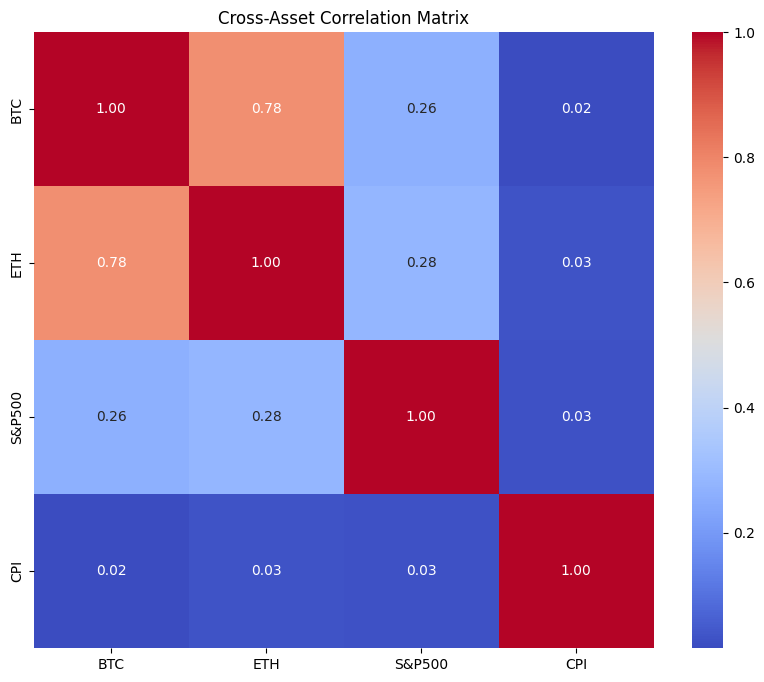

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Cross-Asset Correlation Matrix')
plt.show()

The results were visualized using a heatmap for better interpretation.

Interpretation of Cross-Asset Correlations

The correlation analysis reveals that:
- BTC and ETH exhibit a strong positive correlation (0.78), indicating that they often move together.
- BTC and S&P500 show a weak positive correlation (0.26), suggesting that BTC still retains some diversification potential against the equity market.
- CPI shows almost no correlation with BTC, ETH, or S&P500 on daily returns, highlighting that short-term crypto movements are less influenced by inflation shocks.

This analysis emphasizes the need for careful portfolio construction when combining crypto with traditional assets.


##Drawdown Analysis

In [131]:
btc_cleaned['Cumulative Return'] = (1 + btc_cleaned['Daily Return']/100).cumprod()
btc_cleaned['Running Max'] = btc_cleaned['Cumulative Return'].cummax()
btc_cleaned['Drawdown'] = (btc_cleaned['Cumulative Return'] - btc_cleaned['Running Max']) / btc_cleaned['Running Max'] * 100

In [132]:
max_drawdown = btc_cleaned['Drawdown'].min()
print(f"Maximum Drawdown: {max_drawdown:.2f}%")

Maximum Drawdown: -76.63%


In [ ]:


plt.figure(figsize=(12,6))
plt.plot(btc_cleaned.index, btc_cleaned['Drawdown'], color='red', label='Drawdown')
plt.title('Bitcoin Drawdown Analysis')
plt.xlabel('Date')
plt.ylabel('Drawdown (%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

 Drawdown Analysis

The drawdown curve reveals the risk profile of Bitcoin over the analyzed period. We observe several major drawdowns:
- At some points, Bitcoin experienced declines exceeding **-70%** from its previous peaks.
- Such drawdowns are typical for highly volatile assets like cryptocurrencies.

Understanding drawdowns is crucial for portfolio risk management and setting realistic expectations for investors. Drawdown analysis complements volatility metrics by capturing the path-dependency of losses.

The plot shows Bitcoin drawdowns from 2021 to 2025.


recovery time

In [133]:
def calculate_drawdown_periods(df):
    results = []
    peak_date = df.index[0]
    running_max = df['Cumulative Return'].iloc[0]
    in_drawdown = False
    drawdown_start_date = None
    drawdown_min = 0

    for date, row in df.iterrows():
        if row['Cumulative Return'] >= running_max:
            running_max = row['Cumulative Return']
            if in_drawdown:
                # closing drawdown
                drawdown_end_date = date
                duration = (drawdown_end_date - drawdown_start_date).days
                results.append({
                    'Start': drawdown_start_date,
                    'End': drawdown_end_date,
                    'Duration (days)': duration,
                    'Min Drawdown (%)': drawdown_min * 100
                })
                in_drawdown = False
        else:
            if not in_drawdown:
                # start drawdown
                drawdown_start_date = date
                in_drawdown = True
                drawdown_min = row['Drawdown']
            else:
                drawdown_min = min(drawdown_min, row['Drawdown'])
    return pd.DataFrame(results)


In [134]:
btc_drawdown_periods = calculate_drawdown_periods(btc_cleaned)

print("BTC Drawdown Periods:")
display(btc_drawdown_periods)

BTC Drawdown Periods:


,Start,End,Duration (days),Min Drawdown (%)
0,2020-07-11,2020-07-21,10,-157.972968
1,2020-07-24,2020-07-25,1,-46.111423
2,2020-07-28,2020-07-29,1,-71.013289
3,2020-08-02,2020-08-06,4,-600.342656
4,2020-08-07,2020-08-10,3,-151.361809
5,2020-08-11,2020-08-16,5,-393.653439
6,2020-08-18,2020-10-21,64,-1732.345391
7,2020-10-23,2020-10-24,1,-26.494544
8,2020-10-25,2020-10-27,2,-58.657541
9,2020-10-28,2020-10-31,3,-280.450754


The table below shows the historical drawdown periods of Bitcoin from 2021 to 2025. Each period is defined by:
- The start and end dates of the drawdown.
- The duration of the drawdown (in days).
- The maximum drawdown percentage.

This analysis helps to understand the risk profile and volatility cycles of Bitcoin


## Sharpe Ratio Dynamics

In [135]:

daily_returns = btc_cleaned['Daily Return'] / 100

annual_volatility = daily_returns.std() * np.sqrt(252)

annual_return = daily_returns.mean() * 252

risk_free_rate = 0.0

# Sharpe Ratio
sharpe_ratio = (annual_return - risk_free_rate) / annual_volatility

print(f"Annualized Sharpe Ratio: {sharpe_ratio:.2f}")

Annualized Sharpe Ratio: 0.93
